<a href="https://colab.research.google.com/github/withlionbuddha/learning.ai/blob/ground/semisupervisedlearning/SemiSupervisedClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

scikit-learn 공식 문서


---

논문
*  저자 <br>
   Xiaojin Zhu, Zoubin Ghahramani, John Lafferty
*  제목 <br>
   Semi-supervised learning using Gaussian fields and harmonic functions
*  내용 <br>
   이 논문은 반지도 학습에서 그래프 기반 방법론을 제안한 중요한 연구 중 하나입니다. 이 방법에서는 데이터 포인트를 노드로 보고, 이들 간의 관계(유사성)를 간선으로 연결한 그래프를 구축합니다. 일부 노드는 레이블이 주어지고, 나머지 레이블은 Gauss 필드와 조화 함수(harmonic function)를 사용하여 예측됩니다. 이 논문은 그래프 기반 반지도 학습의 기초가 되었으며, 이후 다양한 그래프 기반 학습 방법의 이론적 기반이 되었습니다.
* 핵심 아이디어<br>
  레이블 전파를 통해 레이블이 없는 데이터에 대해 레이블을 추론하는 방식으로, 데이터의 근접성이나 유사성을 기반으로 학습을 수행합니다.
* 다운로드 <br>
  이 논문은 arXiv(https://arxiv.org/abs/1207.4192) 에서 확인할 수 있습니다.

<br>
📚 책

*   제목 <br>
    Semi-Supervised Learning
*  저자 <br>
   Olivier Chapelle, Bernhard Schölkopf, Alexander Zien
*  내용 <br>
   이 책은 반지도 학습의 이론과 실제를 다룬 포괄적인 교과서로, 반지도 학습에 대한 중요한 이론과 알고리즘을 소개합니다. 그래프 기반 방법(graph-based methods), EM 알고리즘, 트랜스덕션(Transduction) 등 여러 반지도 학습 기법에 대해 상세하게 다룹니다. 책에서는 다양한 학습 방법과 이들의 응용 사례에 대한 내용도 포함하고 있습니다.
* 핵심 개념 <br>
  반지도 학습에서 레이블된 데이터가 적을 때, 비레이블된 데이터를 어떻게 활용할 것인가에 대한 논의가 핵심입니다. 또한 그래프 기반 알고리즘, SVM 등을 활용한 반지도 학습 방법들이 다루어집니다.
* 추천 대상 <br>
  반지도 학습을 깊이 이해하고 연구하는 연구자나 대학원생, 또는 실무에서 이를 응용하려는 사람들에게 유용한 자료입니다.








In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import adjusted_rand_score
from sklearn.semi_supervised import LabelPropagation, LabelSpreading
from sklearn.cluster import KMeans

In [7]:

# Iris 데이터셋 로드
iris = datasets.load_iris()
X = iris.data[:, :2]  # 편의를 위해 2차원 데이터만 사용
y = iris.target


In [8]:
# 재현성을 위해 난수 시드 설정
np.random.seed(42)

# 전체 데이터 중 10%만 레이블된 데이터로 사용
num_total_samples = len(y)
num_labeled_samples = int(0.1 * num_total_samples)
indices = np.arange(num_total_samples)
np.random.shuffle(indices)

labeled_indices = indices[:num_labeled_samples]
unlabeled_indices = indices[num_labeled_samples:]

labels = np.copy(y)
labels[unlabeled_indices] = -1  # 레이블이 없는 데이터는 -1로 표시


In [9]:
# Label Propagation 모델 생성
label_prop_model = LabelPropagation(kernel='knn', n_neighbors=7)

# 모델 학습
label_prop_model.fit(X, labels)

# 레이블 예측
predicted_labels = label_prop_model.transduction_


Adjusted Rand Index (Label Propagation): 0.5395


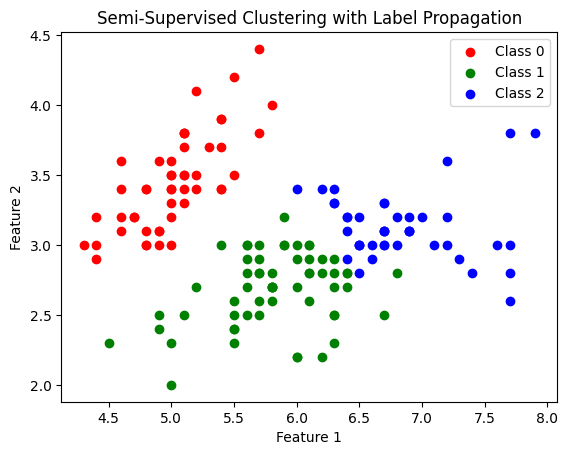

In [10]:
# 평가 (Adjusted Rand Index)
ari = adjusted_rand_score(y, predicted_labels)
print(f"Adjusted Rand Index (Label Propagation): {ari:.4f}")

# 시각화
colors = ['red', 'green', 'blue']
for class_label, color in zip(np.unique(predicted_labels), colors):
    class_data = X[predicted_labels == class_label]
    plt.scatter(class_data[:, 0], class_data[:, 1], c=color, label=f'Class {class_label}')

plt.legend()
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Semi-Supervised Clustering with Label Propagation')
plt.show()


In [11]:
# Label Spreading 모델 생성
label_spread_model = LabelSpreading(kernel='knn', n_neighbors=7)

# 모델 학습
label_spread_model.fit(X, labels)

# 레이블 예측
predicted_labels_spread = label_spread_model.transduction_

# 평가
ari_spread = adjusted_rand_score(y, predicted_labels_spread)
print(f"Adjusted Rand Index (Label Spreading): {ari_spread:.4f}")


Adjusted Rand Index (Label Spreading): 0.5081


In [12]:
# Label Spreading 모델 생성
label_spread_model = LabelSpreading(kernel='knn', n_neighbors=7)

# 모델 학습
label_spread_model.fit(X, labels)

# 레이블 예측
predicted_labels_spread = label_spread_model.transduction_

# 평가
ari_spread = adjusted_rand_score(y, predicted_labels_spread)
print(f"Adjusted Rand Index (Label Spreading): {ari_spread:.4f}")


Adjusted Rand Index (Label Spreading): 0.5081


In [13]:
from sklearn.cluster import KMeans

# K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_labels = kmeans.fit_predict(X)

# 평가
kmeans_ari = adjusted_rand_score(y, kmeans_labels)
print(f"Adjusted Rand Index (K-Means): {kmeans_ari:.4f}")


Adjusted Rand Index (K-Means): 0.6007


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [14]:
print("=== Adjusted Rand Index Scores ===")
print(f"Label Propagation: {ari:.4f}")
print(f"Label Spreading: {ari_spread:.4f}")
print(f"K-Means (No Labels): {kmeans_ari:.4f}")


=== Adjusted Rand Index Scores ===
Label Propagation: 0.5395
Label Spreading: 0.5081
K-Means (No Labels): 0.6007


In [15]:
# RBF 커널을 사용하는 Label Spreading
label_spread_rbf = LabelSpreading(kernel='rbf', gamma=20)
label_spread_rbf.fit(X, labels)
predicted_labels_rbf = label_spread_rbf.transduction_
ari_rbf = adjusted_rand_score(y, predicted_labels_rbf)
print(f"Adjusted Rand Index (Label Spreading with RBF Kernel): {ari_rbf:.4f}")


Adjusted Rand Index (Label Spreading with RBF Kernel): 0.5195
